
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 AutoEncoder || CIFAR10 || Generative-AI🔥</div>


<div style="text-align:center">
    <img src="https://miro.medium.com/v2/resize:fit:850/0*XeWl7ip-VXp4QXov.png
" alt="Image">
</div>

### Autoencoders: An Overview

Autoencoders are a type of neural network used to learn efficient codings of unlabeled data. They work by compressing the input into a latent space representation and then reconstructing the output from this representation. The aim is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction or feature learning.

### Key Components of an Autoencoder

1. **Encoder**: The part of the network that compresses the input into a latent-space representation.
2. **Latent Space**: The compressed, encoded representation of the input data.
3. **Decoder**: The part of the network that reconstructs the input data from the latent-space representation.
4. **Reconstruction Loss**: The difference between the input data and the reconstructed data. The goal is to minimize this loss.

### Autoencoder Architecture

Autoencoders generally have a symmetric structure consisting of an encoder and a decoder. Here's a high-level architecture:

1. **Input Layer**: Takes the input data (e.g., an image).
2. **Encoder Layers**: A series of layers that reduce the dimensionality of the input data.
3. **Latent Space**: A bottleneck layer that holds the compressed representation of the input data.
4. **Decoder Layers**: A series of layers that expand the latent space back to the original input dimensions.
5. **Output Layer**: Produces the reconstructed input.

### The Autoencoder Process

1. **Encoding**:
   - The input data is fed into the encoder.
   - The encoder compresses the input into a lower-dimensional latent space.

2. **Latent Space**:
   - The compressed representation (latent space) captures the most important features of the input data.

3. **Decoding**:
   - The latent space representation is fed into the decoder.
   - The decoder reconstructs the input data from the latent representation.

4. **Reconstruction**:
   - The output of the decoder is compared to the original input.
   - The reconstruction loss is calculated (e.g., Mean Squared Error).

5. **Training**:
   - The autoencoder is trained using backpropagation to minimize the reconstruction loss.
   - Optimizers like Adam or SGD are commonly used to update the weights.

### Mathematical Formulation

Given an input \( x \), the encoder function \( f \) maps \( x \) to a latent representation \( h \):
\[ h = f(x) \]

The decoder function \( g \) maps \( h \) back to the reconstructed input \( \hat{x} \):
\[ \hat{x} = g(h) = g(f(x)) \]

The goal is to make \( \hat{x} \) as close to \( x \) as possible by minimizing the reconstruction loss \( L \):
\[ L(x, \hat{x}) = L(x, g(f(x))) \]

Common choices for the loss function \( L \) include Mean Squared Error (MSE) for continuous data and Binary Cross-Entropy for binary data.


### Key Takeaways
- **Autoencoders** are used for unsupervised learning, where the network learns to reconstruct the input data.
- They have an **encoder** to compress the data and a **decoder** to reconstruct it.
- **Applications** include dimensionality reduction, denoising, anomaly detection, and more.
- **Training** involves minimizing the reconstruction loss to ensure the output is as close to the input as possible.

By understanding these concepts, you can leverage autoencoders for a variety of tasks in machine learning and data science.


<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">📚Importing Libraries📚</div>


<div style="text-align:center">
    <img src="https://static.vecteezy.com/system/resources/thumbnails/013/083/739/small_2x/stick-man-with-book-shelves-in-library-education-and-learning-concept-3d-illustration-or-3d-rendering-png.png
" alt="Image">
</div>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
import seaborn as sns

2024-06-28 03:18:38.676223: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-28 03:18:38.676327: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-28 03:18:38.835196: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered



<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">📜 Dataset Loading 📜</div>


In [2]:
(x_train,_),(x_test,_) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train),32,32,3))
x_test = x_test.reshape((len(x_test),32,32,3))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
input_img = Input(shape = (32,32,3))


<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 AutoEncoder Model Generative-AI🔥</div>


<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Encoder ✔
  </div>
</div>

In [4]:
encoded = Conv2D(32,(3,3),padding = 'same')(input_img)
encoded = BatchNormalization()(encoded) 
encoded = LeakyReLU()(encoded)
encoded = MaxPooling2D((2,2),padding = 'same')(encoded)

encoded = Conv2D(64,(3,3),padding = 'same')(encoded)
encoded = BatchNormalization()(encoded)
encoded = LeakyReLU()(encoded)
encoded = MaxPooling2D((2,2),padding = 'same')(encoded)

encoded = Conv2D(128,(3,3),padding = 'same')(encoded)
encoded = BatchNormalization()(encoded)
encoded = LeakyReLU()(encoded)
encoded = MaxPooling2D((2,2),padding = 'same')(encoded)

encoded = Flatten()(encoded)
encoded = Dense(256, activation='relu')(encoded)

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Decoder ✔
  </div>
</div>

In [5]:
decoded = Dense(4 * 4 * 128, activation='relu')(encoded)
decoded = Reshape((4, 4, 128))(decoded)

decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(128, (3, 3), padding='same')(decoded)
decoded = BatchNormalization()(decoded)
decoded = LeakyReLU()(decoded)

decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(64, (3, 3), padding='same')(decoded)
decoded = BatchNormalization()(decoded)
decoded = LeakyReLU()(decoded)

decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(32, (3, 3), padding='same')(decoded)
decoded = BatchNormalization()(decoded)
decoded = LeakyReLU()(decoded)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoded)

In [6]:
# Autoencoder model
autoencoder = Model(input_img, decoded)


<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 AutoEncoder Summary🔥</div>


In [7]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2048)           │       526,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        73,79

 Total params: 1,386,627 (5.29 MB)

 Trainable params: 1,385,731 (5.29 MB)

 Non-trainable params: 896 (3.50 KB)

In [8]:
# Compile the model
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy',metrics=['accuracy'])


<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 AutoEncoder Model Training🔥</div>


In [9]:
# Train the model
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

Epoch 1/50
  2/196 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.3453 - loss: 0.7896 

I0000 00:00:1719544758.405869      70 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1719544758.431784      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1719544758.435490      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5143 - loss: 0.6259

W0000 00:00:1719544770.561893      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1719544770.565441      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1719544772.444817      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


196/196 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.5146 - loss: 0.6258 - val_accuracy: 0.3122 - val_loss: 0.6404
Epoch 2/50


W0000 00:00:1719544774.206239      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.6768 - loss: 0.5827 - val_accuracy: 0.5633 - val_loss: 0.5898
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.7095 - loss: 0.5775 - val_accuracy: 0.6857 - val_loss: 0.5785
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.7232 - loss: 0.5741 - val_accuracy: 0.7202 - val_loss: 0.5767
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.7338 - loss: 0.5731 - val_accuracy: 0.7148 - val_loss: 0.5807
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.7393 - loss: 0.5714 - val_accuracy: 0.7444 - val_loss: 0.5746
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.7448 - loss: 0.5706 - val_accuracy: 0.7404 - val_loss: 0.5715
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.7464 - loss: 0.5701 - val_accuracy: 0.7513 - val_loss: 0.5711
Epoch 9/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.7469 - loss: 0.5692 - val_accuracy: 0.74


<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 Training Graph🔥</div>


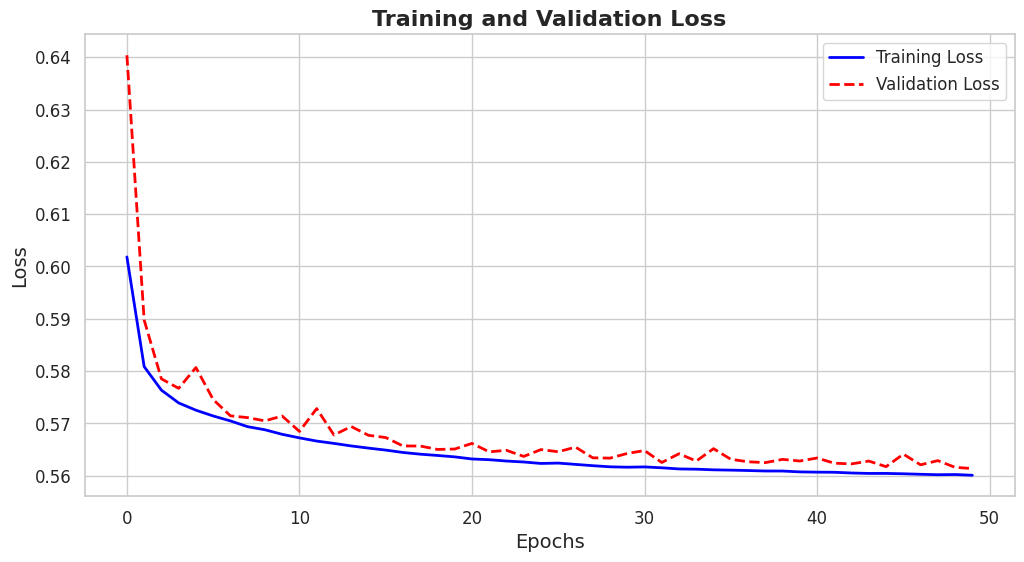

In [10]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plotting the training and validation loss with Seaborn
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='--', linewidth=2)
plt.title('Training and Validation Loss', fontsize=16, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

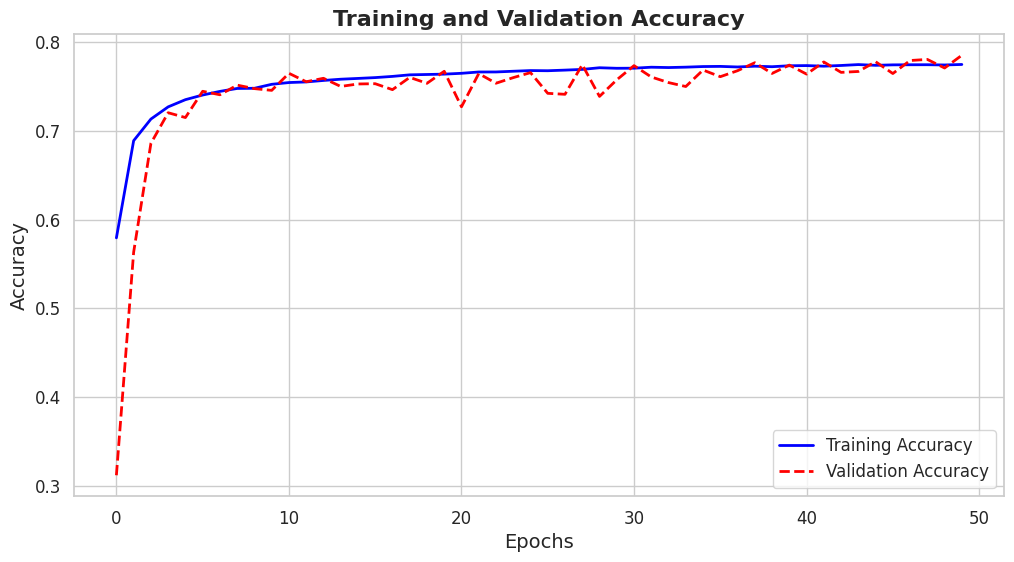

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linestyle='--', linewidth=2)
plt.title('Training and Validation Accuracy', fontsize=16, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 AutoEncoder Model Prediction🔥</div>


 87/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1719545132.174089      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


W0000 00:00:1719545133.472451      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


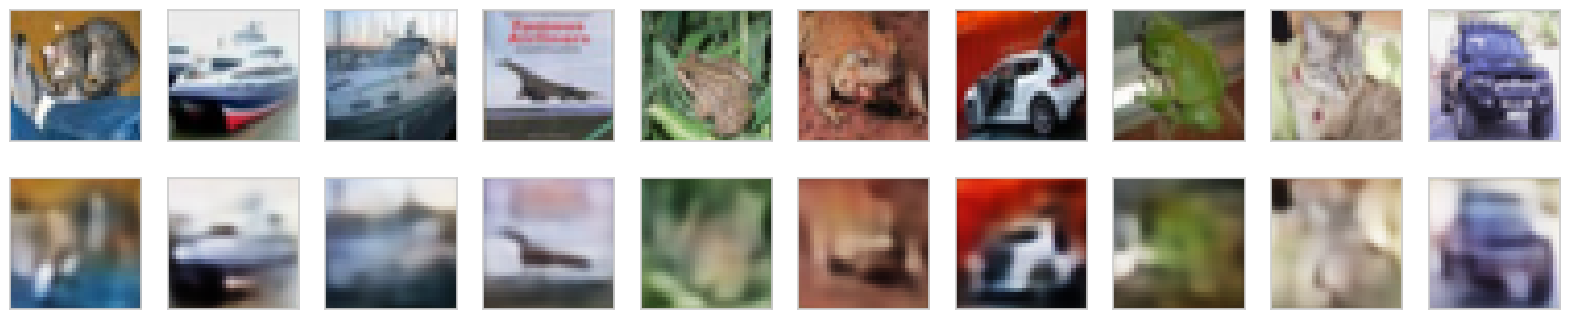

In [12]:
decoded_imgs = autoencoder.predict(x_test)

# Plot the original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()